In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


# hide warnings
import warnings
warnings.filterwarnings(action="ignore")



In [2]:
train = pd.read_csv('./house_train.csv')
test = pd.read_csv('./test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

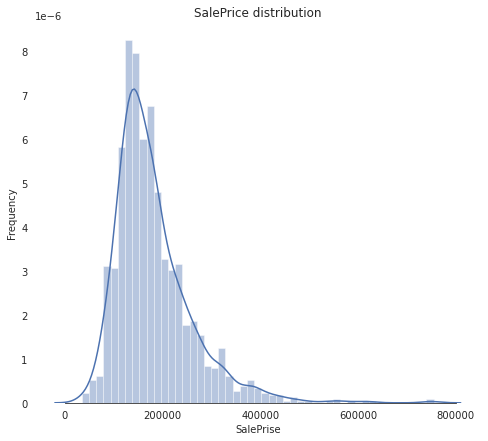

In [4]:
sns.set_style("white")
sns.set_color_codes(palette='deep')

f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(train['SalePrice'], color='b')
ax.xaxis.grid(False)
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrise")
ax.set_title("SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [5]:
# find numeric features

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in train.columns:
    if train[i].dtype in numeric_dtypes:
        numeric.append(i)


In [6]:
numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


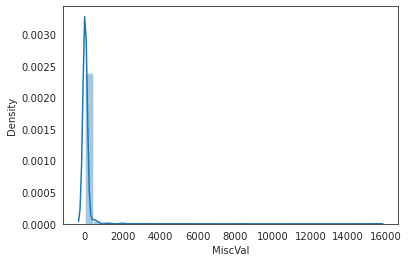

<AxesSubplot:xlabel='MiscVal'>

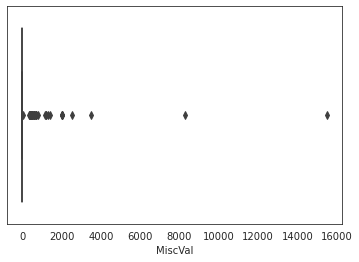

In [7]:
print(train.MiscVal.describe())
sns.distplot(train.MiscVal)
plt.show()
sns.boxplot(train.MiscVal)

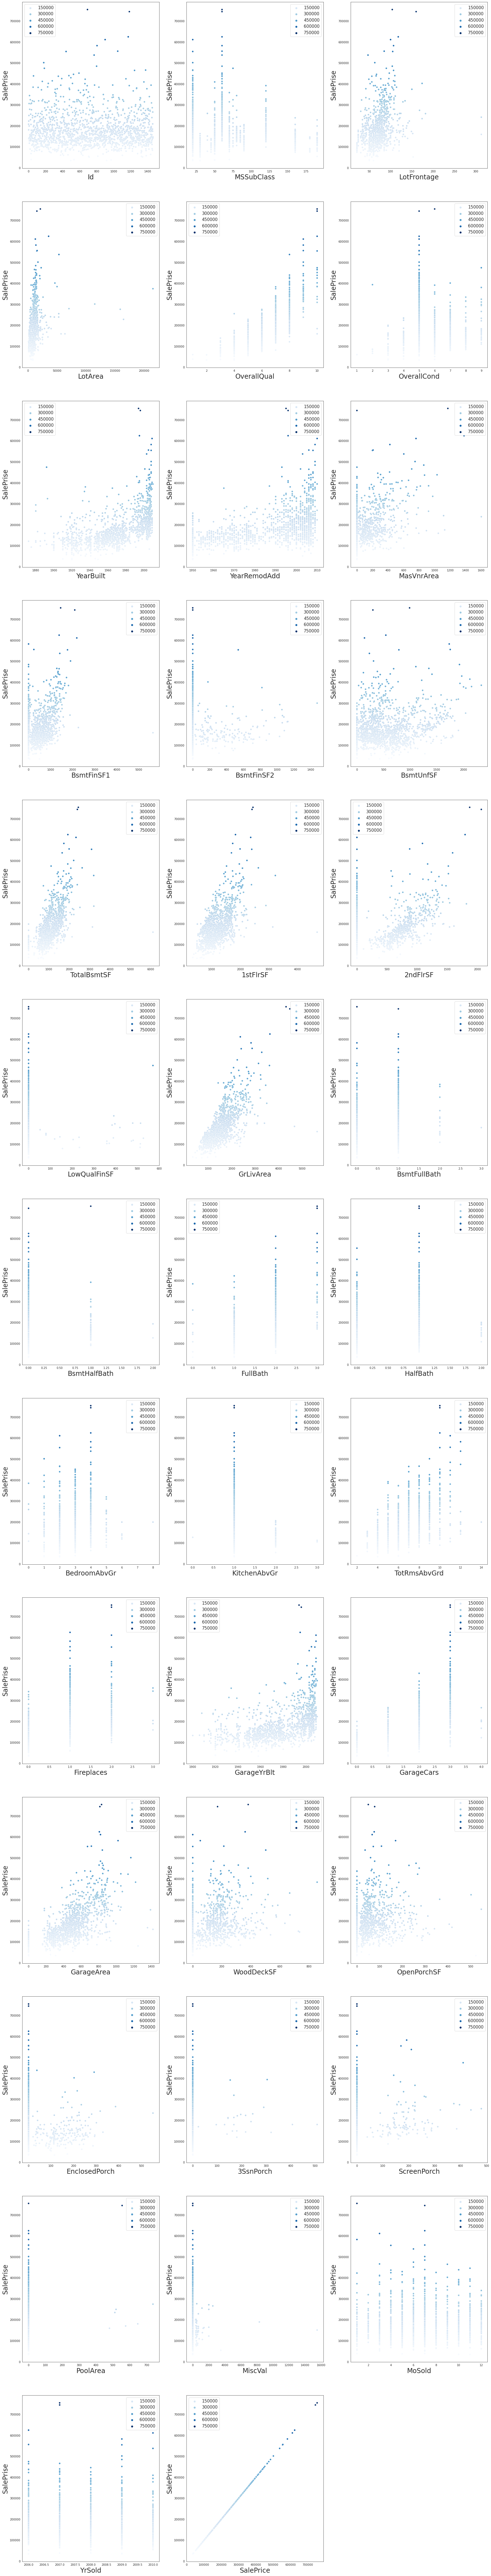

In [8]:
fig, axs = plt.subplots(figsize=(30, 500))

for i, feature in enumerate(list(train[numeric]), 1):
    plt.subplot(len(list(numeric)), 3 , i)
    sns.scatterplot(x=feature, data= train, y="SalePrice", palette='Blues', hue="SalePrice")
    
    plt.xlabel("{}".format(feature), size = 24)
    plt.ylabel("SalePrise", size = 24)
    
    plt.legend(prop={"size":15})
    
plt.show()

# Features correlation to each other

<AxesSubplot:>

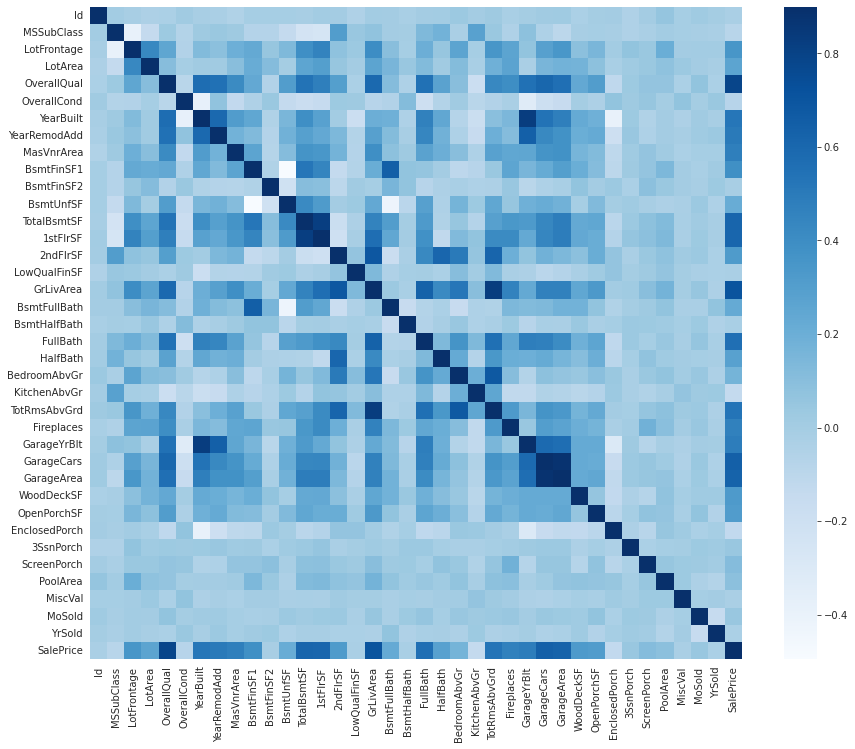

In [9]:
corr = train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues",square=True)

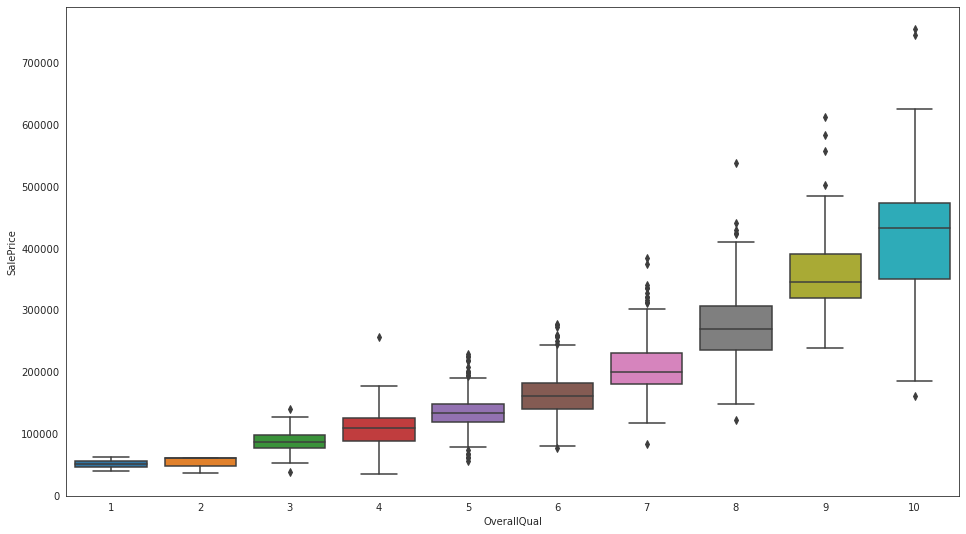

In [10]:
f, ax = plt.subplots(figsize=(16,9))
data = pd.concat([train.OverallQual, train.SalePrice], axis = 1)
fig = sns.boxplot(data=data, x=train.OverallQual, y=train.SalePrice)

plt.show()

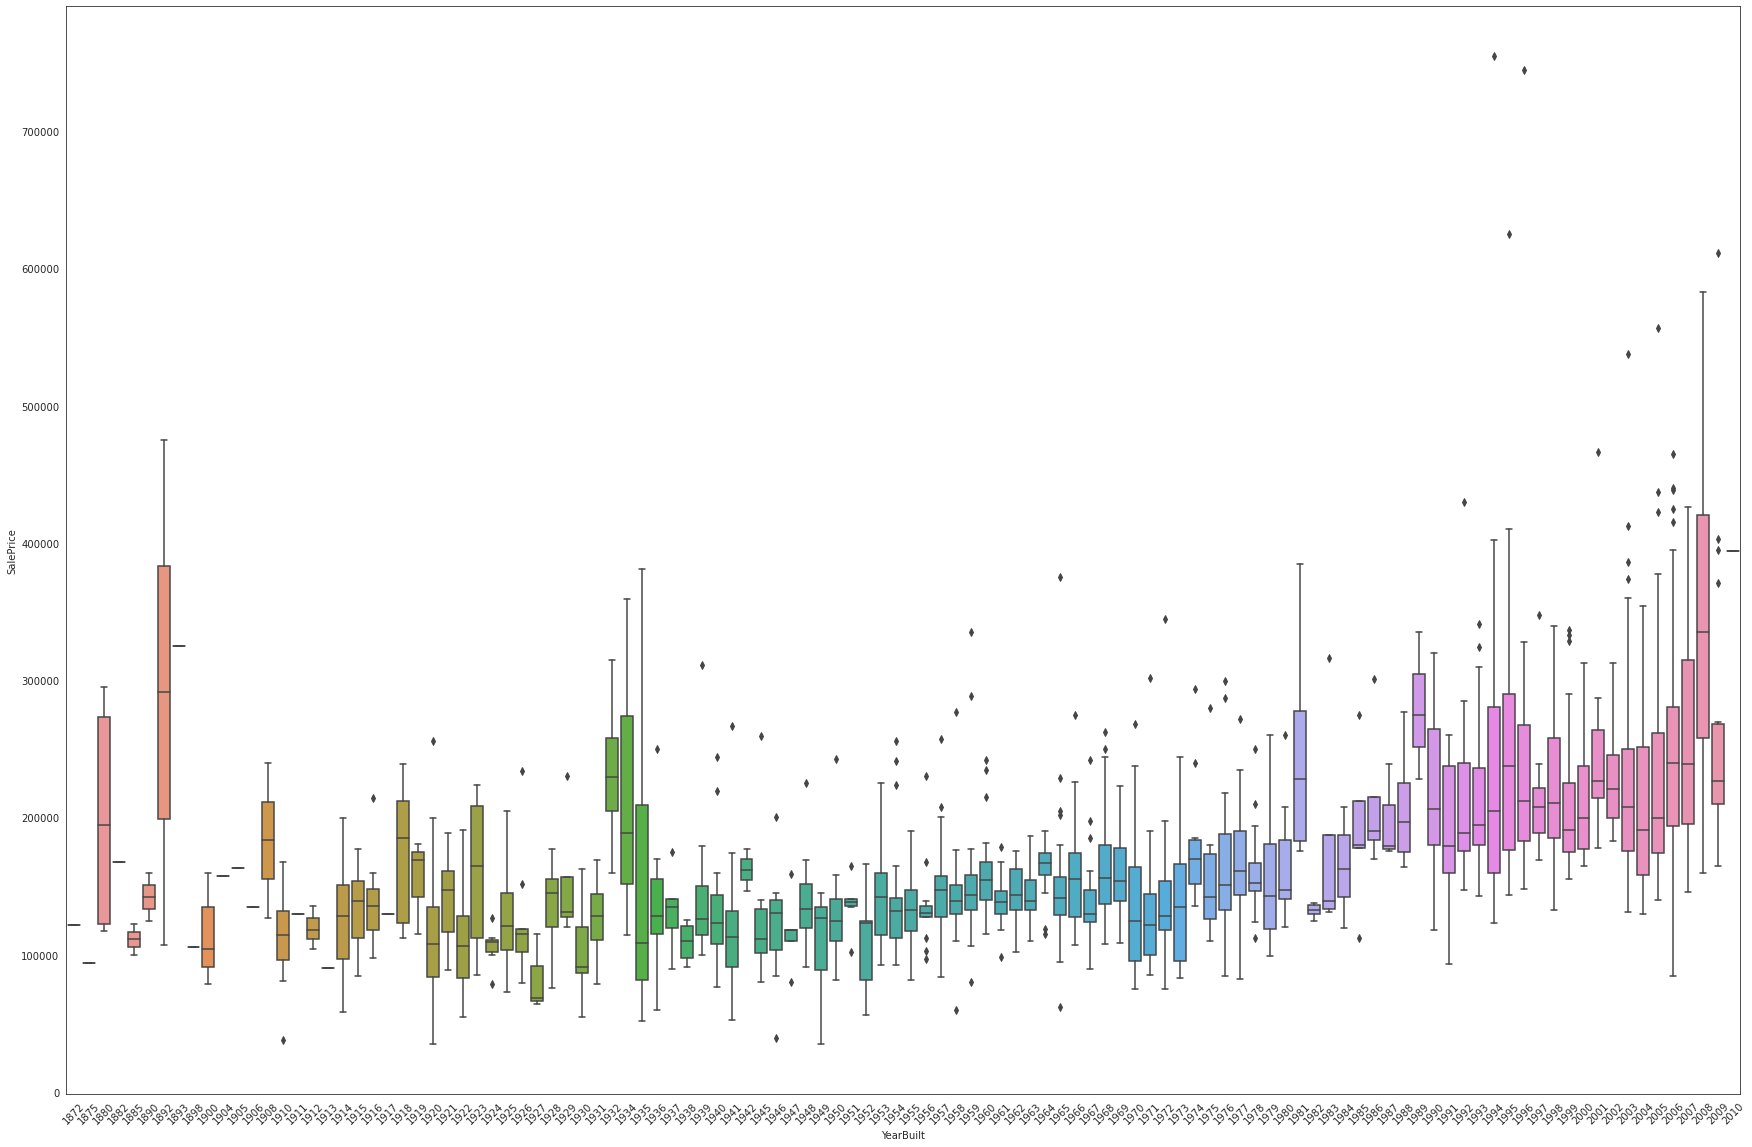

In [11]:
data = pd.concat([train.YearBuilt, train.SalePrice], axis = 1)
f, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(x=train.YearBuilt, y='SalePrice', data=data)
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

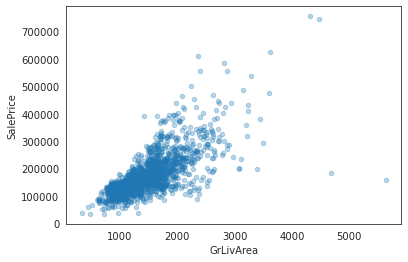

In [12]:
data = pd.concat([train.GrLivArea, train.SalePrice], axis = 1)
data.plot.scatter(x="GrLivArea", y='SalePrice',alpha=0.3)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

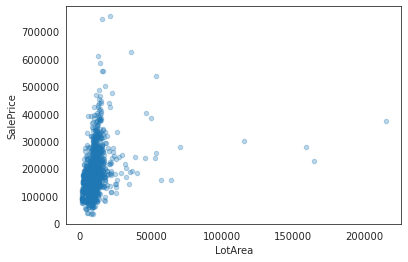

In [13]:
data = pd.concat([train.LotArea, train.SalePrice], axis = 1)
data.plot.scatter(x="LotArea", y='SalePrice',alpha=0.3)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

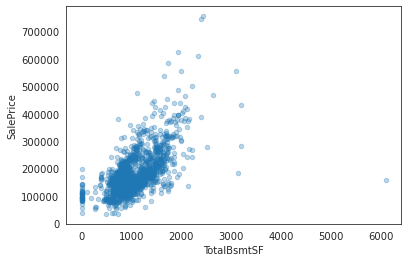

In [14]:
data = pd.concat([train.TotalBsmtSF, train.SalePrice], axis = 1)
data.plot.scatter(x="TotalBsmtSF", y='SalePrice',alpha=0.3)

In [15]:
train_ID = train.Id
test_ID = test.Id

train.drop(['Id'],axis=1, inplace=True)
test.drop(['Id'],axis=1, inplace=True)

train.shape, test.shape

((1460, 80), (1459, 79))

# **Feature Engineering**

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

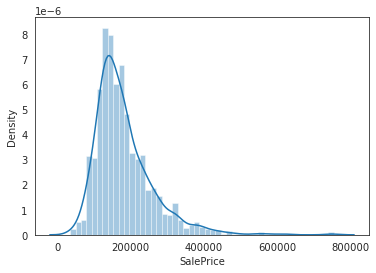

In [16]:
sns.distplot(train.SalePrice)

In [17]:
train.SalePrice.skew(), train.SalePrice.kurt()

(1.8828757597682129, 6.536281860064529)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

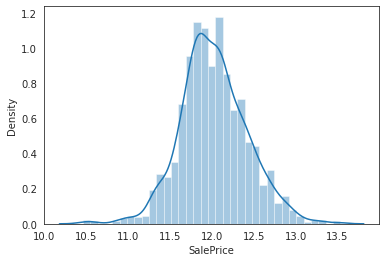

In [18]:
# log(x+1) transformation to get target value to normal distribution
train.SalePrice = np.log1p(train.SalePrice)
sns.distplot(train.SalePrice)

In [19]:
train.SalePrice.skew(), train.SalePrice.kurt()

(0.12134661989685333, 0.809519155707878)

In [20]:
# Remove outsiders
train.drop(train[(train['OverallQual']<=5) & (train['SalePrice']>200000)].index,  inplace=True)
train.drop(train[(train['GrLivArea']> 4300) & (train['SalePrice']< 300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

In [21]:
train.shape

(1456, 80)

In [22]:
train_labels = train.SalePrice.reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
teast_features = test

all_features = pd.concat([train_features, teast_features]).reset_index(drop=True)
all_features.shape

(2915, 79)

In [23]:
# determine threshold fo missing values
def percentage_missing_values(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    miss_dict = {}
    for i in range(len(df_cols)):
        miss_dict.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100, 2)})
    return miss_dict

missing = percentage_missing_values(all_features)
df_miss = sorted(missing.items(), key= lambda x: x[1], reverse=True)

print('Percent of missing data')
df_miss[:15]


Percent of missing data


[('PoolQC', 99.73),
 ('MiscFeature', 96.4),
 ('Alley', 93.21),
 ('Fence', 80.45),
 ('FireplaceQu', 48.71),
 ('LotFrontage', 16.67),
 ('GarageYrBlt', 5.45),
 ('GarageFinish', 5.45),
 ('GarageQual', 5.45),
 ('GarageCond', 5.45),
 ('GarageType', 5.39),
 ('BsmtCond', 2.81),
 ('BsmtExposure', 2.81),
 ('BsmtQual', 2.78),
 ('BsmtFinType2', 2.74)]

In [24]:
train_features.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

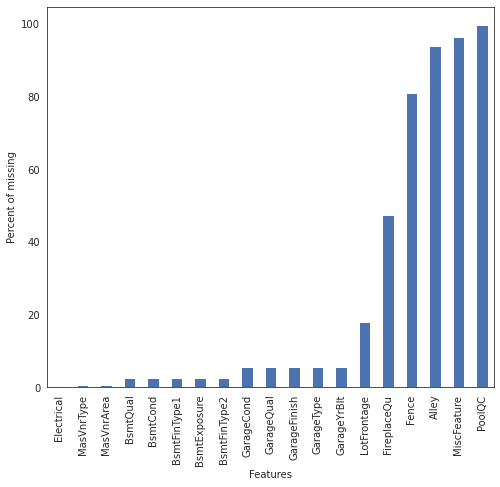

<Figure size 432x288 with 0 Axes>

In [25]:
f, ax = plt.subplots(figsize = (8, 7))
missing = round(train.isnull().mean()*100, 2)
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
plt.xlabel("Features")
plt.ylabel('Percent of missing')
plt.show()
sns.despine(trim=True, left=True)

In [26]:
all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)
all_features['YrSold'] = all_features['YrSold'].astype(str)
all_features['MoSold'] = all_features['MoSold'].astype(str)

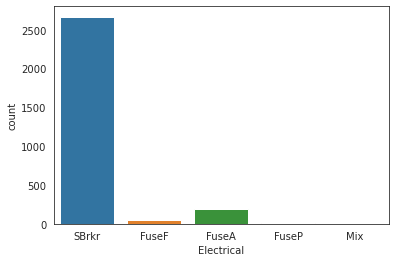

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [27]:
all_features['Electrical'] = all_features['Electrical'].fillna('SBrkr') 
sns.countplot(x=all_features.Electrical)
plt.show()
all_features.Electrical.unique()

In [28]:
for col in ('GarageType', "GarageCond",'GarageType', 'GarageQual', 'GarageFinish'):
    all_features[col] = all_features[col].fillna('None')
    
# categorial
categorial = ('MasVnrType', "BsmtQual", 'BsmtCond', 'BsmtFinType1', 
              'BsmtExposure', 'BsmtFinType2', 'FireplaceQu', 'Fence', 'Alley',
             'MiscFeature', 'PoolQC', 'GarageFinish', 'MSZoning', 
             'Utilities', 'BsmtFullBath', 'BsmtHalfBath', 
             )
for col in categorial:
    all_features[col] = all_features[col].fillna('None')
    
# float
for col in ('MasVnrArea', 'GarageYrBlt', 'LotFrontage'):
    all_features[col] = all_features[col].fillna(0)

    


In [29]:
all_features['LotFrontage'] = all_features.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)
all_features.Functional = all_features.Functional.fillna('Typ')
all_features.Exterior1st = all_features.Exterior1st.fillna('VinylSd')
all_features.Exterior2nd = all_features.Exterior2nd.fillna('VinylSd')
all_features.KitchenQual = all_features.KitchenQual.fillna('TA')
all_features.SaleType = all_features.SaleType.fillna('WD')


In [30]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        all_features[i] = all_features[i].fillna(0)

        

In [31]:
missing = percentage_missing_values(all_features)
df_miss = sorted(missing.items(), key= lambda x: x[1], reverse=True)

print('Percent of missing data')
df_miss[:15]

Percent of missing data


[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', 0.0)]

# No missing values)))

# Lets deal with skew

In [43]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)

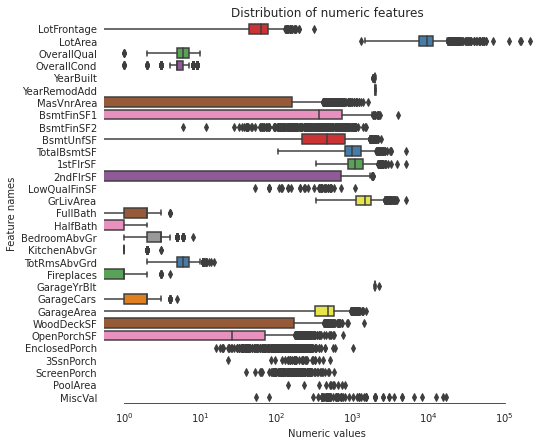

In [52]:
f, ax = plt.subplots(figsize = (8, 7))
ax.set_xscale('log')
sns.boxplot(data=all_features[numeric], orient='h', palette="Set1")
ax.set(xlabel="Numeric values")
ax.set(ylabel="Feature names")
ax.set(title= 'Distribution of numeric features')
sns.despine(trim=True, left=True)
plt.show()

In [59]:
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending= False)

high_skew = skew_features[skew_features>0.5]
skew_indices = high_skew.index

high_skew

MiscVal          21.932147
PoolArea         18.701829
LotArea          13.123758
LowQualFinSF     12.080315
3SsnPorch        11.368094
KitchenAbvGr      4.298845
BsmtFinSF2        4.142863
EnclosedPorch     4.000796
ScreenPorch       3.943508
MasVnrArea        2.600697
OpenPorchSF       2.529245
WoodDeckSF        1.848285
1stFlrSF          1.253011
GrLivArea         0.977860
BsmtFinSF1        0.974138
BsmtUnfSF         0.920135
2ndFlrSF          0.843237
TotRmsAbvGrd      0.749579
Fireplaces        0.725958
HalfBath          0.698770
TotalBsmtSF       0.662657
OverallCond       0.569143
dtype: float64

In [63]:
for i in skew_indices:
    all_features[i] = boxcox1p(all_features[i], boxcox_normmax(all_features[i]+1))

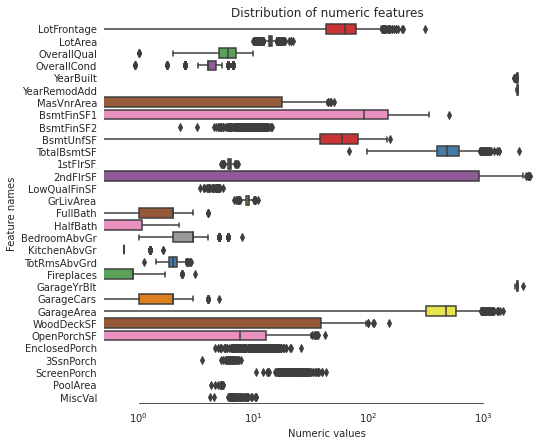

In [64]:
f, ax = plt.subplots(figsize = (8, 7))
ax.set_xscale('log')
sns.boxplot(data=all_features[numeric], orient='h', palette="Set1")
ax.set(xlabel="Numeric values")
ax.set(ylabel="Feature names")
ax.set(title= 'Distribution of numeric features')
sns.despine(trim=True, left=True)
plt.show()

In [65]:
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending= False)

high_skew = skew_features[skew_features>0.5]
skew_indices = high_skew.index

high_skew

PoolArea         16.290037
3SsnPorch         8.858944
LowQualFinSF      8.489627
MiscVal           5.236070
KitchenAbvGr      3.776776
ScreenPorch       3.151351
BsmtFinSF2        2.577190
EnclosedPorch     2.148107
MasVnrArea        0.977442
2ndFlrSF          0.892739
WoodDeckSF        0.786377
HalfBath          0.734482
OpenPorchSF       0.621703
Fireplaces        0.553408
dtype: float64

In [75]:
pd.options.display.max_columns = None

# Create new features

In [105]:
all_features["TotalArea"] = (all_features.LotArea+all_features.MasVnrArea + all_features.BsmtFinSF1 +
all_features.BsmtFinSF2+all_features.BsmtUnfSF+ all_features['1stFlrSF']+ all_features['2ndFlrSF']+
all_features['LowQualFinSF']+ all_features['GrLivArea'] + all_features['GarageArea']+all_features.PoolArea+
all_features['ScreenPorch']+all_features['3SsnPorch']+ all_features['EnclosedPorch']+all_features['OpenPorchSF']+
                             all_features['WoodDeckSF']
                            )


<AxesSubplot:xlabel='TotalArea', ylabel='SalePrice'>

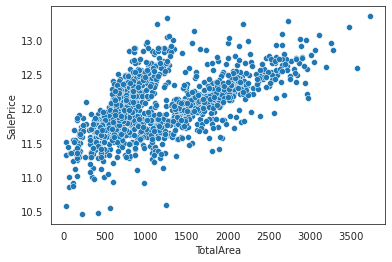

In [106]:
sns.scatterplot(x=all_features.iloc[:len(train_labels),:].TotalArea, y=train_labels)

NameError: name 'Nan' is not defined